# <font color = "#2895A0"> Análise de Correspondência Múltipla </font>

In [1]:
#Bibliotecas para ACM e estatística Chi²
import prince
import scipy.stats as stats 

#Bibliotecas para visualização e manipulação de dados
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import pandas as pd
import numpy as np

In [2]:
#Chamando a base de dados e visualizando os primeiros registros
base_diabete_full = pd.read_csv(r"C:\Users\bruno\Desktop\diabetes_data_upload.csv")
base_diabete_full.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [3]:
#Estudando as propriedades do data frame
base_diabete_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
#Implementando a ACM na base completa para considerações iniciais
base_ACM_full = prince.MCA(
     n_components=2,
     n_iter=3,
     copy=True,
     benzecri= False,
     check_input=True,
     engine='auto',
     random_state=42)

base_ACM_full = base_ACM_full.fit(base_diabete_full) #Lincando o novo objeto com a base de dados

Text(0, 0.5, 'Componente 2 (3.81% inércia)')

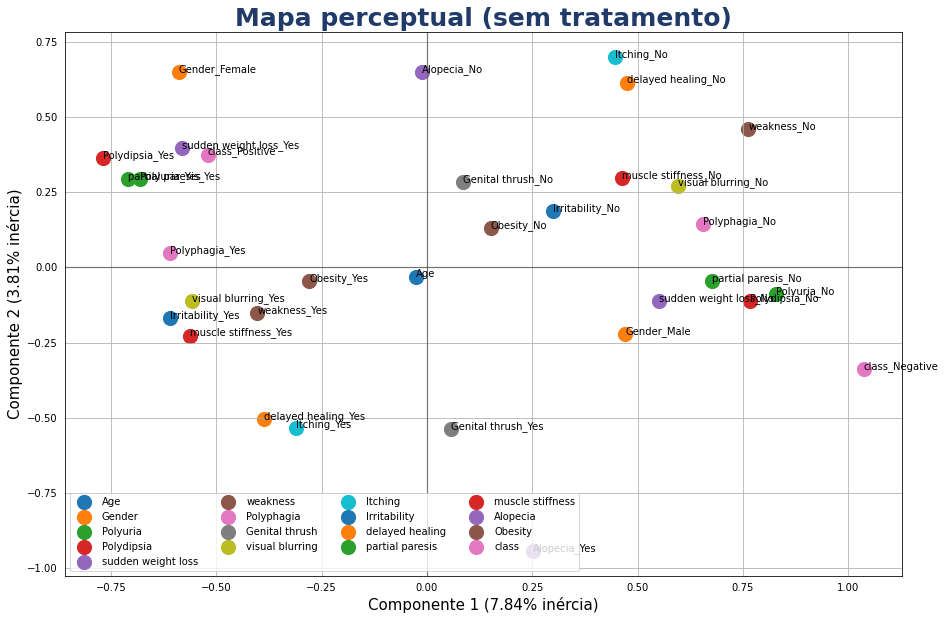

In [5]:
#Criando objeto para plotagem ajuste das coordenadas e plotagem no Mapa Perceptual
ax = base_ACM_full.plot_coordinates(
X = base_diabete_full,
ax=None,
figsize=(15, 10),
show_row_points=False,
show_row_labels=False,
show_column_points=True,
column_points_size=200,
show_column_labels=True,
legend_n_cols=4)

ei = base_ACM_full.explained_inertia_

ax.set_title('Mapa perceptual (sem tratamento)', fontsize=25, color='#213B69', fontweight=1000, loc='center')
ax.set_xlabel('Componente {} ({:.2f}% inércia)'.format(1, 100 * ei[0]), fontsize=15)
ax.set_ylabel('Componente {} ({:.2f}% inércia)'.format(2, 100 * ei[1]), fontsize=15)

In [6]:
#Selecionando as categorias que se mostraram "próximas" da categoria de interesse: class = Positive
base_diabete = base_diabete_full.iloc[:,[2,3,4,6,7,16]]

display(base_diabete)

,Polyuria,Polydipsia,sudden weight loss,Polyphagia,Genital thrush,class
0,No,Yes,No,No,No,Positive
1,No,No,No,No,No,Positive
2,Yes,No,No,Yes,No,Positive
3,No,No,Yes,Yes,Yes,Positive
4,Yes,Yes,Yes,Yes,No,Positive
...,...,...,...,...,...,...
515,Yes,Yes,Yes,Yes,No,Positive
516,Yes,Yes,Yes,Yes,No,Positive
517,Yes,Yes,Yes,Yes,No,Positive
518,No,No,No,No,No,Negative


In [7]:
#RENOMEANDO (E TRADUZINDO) COLUNAS PARA EVITAR PROBLEMAS NO MODELO
base_diabete = base_diabete.rename(columns={'Polyuria' : 'Poliuria', 'Polydipsia' : 'Polidipsia', 'sudden weight loss' : 'PPR',
                                            'Polyphagia' : 'Polifagia', 'Genital thrush' : 'AG', 'class' : 'Resultado'})

display(base_diabete)

,Poliuria,Polidipsia,PPR,Polifagia,AG,Resultado
0,No,Yes,No,No,No,Positive
1,No,No,No,No,No,Positive
2,Yes,No,No,Yes,No,Positive
3,No,No,Yes,Yes,Yes,Positive
4,Yes,Yes,Yes,Yes,No,Positive
...,...,...,...,...,...,...
515,Yes,Yes,Yes,Yes,No,Positive
516,Yes,Yes,Yes,Yes,No,Positive
517,Yes,Yes,Yes,Yes,No,Positive
518,No,No,No,No,No,Negative


In [8]:
#Analisando Descritivamente
display(base_diabete.describe())

,Poliuria,Polidipsia,PPR,Polifagia,AG,Resultado
count,520,520,520,520,520,520
unique,2,2,2,2,2,2
top,No,No,No,No,No,Positive
freq,262,287,303,283,404,320


In [9]:
#Efetuando o Cross tabulation entre cada par de variáveis considerando como fixa a variável Resultado

In [10]:
#Resultado x Poliúria
tabcontig_poliuria = pd.crosstab(base_diabete.Resultado, base_diabete.Poliuria)
display(tabcontig_poliuria.head())

#Chi² Resultado x Poliúria
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(tabcontig_poliuria)
print(f'*** χ² = {chi2:.2f} e p-value = {pvalor:}\n')
#print(f'*** χ² = {chi2:.2f} e p-value = {pvalor:.100f}\n') #OPÇÃO SEM NOTAÇÃO CIENTÍFICA
if (pvalor <= 0.05):
    print("EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS")
else:
    print("NÃO EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS")

Poliuria,No,Yes
Resultado,,
Negative,185,15
Positive,77,243


*** χ² = 227.87 e p-value = 1.7409117803442155e-51

EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS


In [11]:
#Resultado x Polidipsia
tabcontig_polidipsia = pd.crosstab(base_diabete.Resultado, base_diabete.Polidipsia)
display(tabcontig_polidipsia.head())

#Chi² Resultado x Polidipsia
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(tabcontig_polidipsia)
print(f'*** χ² = {chi2:.2f} e p-value = {pvalor:}\n')
#print(f'*** χ² = {chi2:.2f} e p-value = {pvalor:.100f}\n') #OPÇÃO SEM NOTAÇÃO CIENTÍFICA
if (pvalor <= 0.05):
    print("EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS")
else:
    print("NÃO EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS")

Polidipsia,No,Yes
Resultado,,
Negative,192,8
Positive,95,225


*** χ² = 216.17 e p-value = 6.1870096408863144e-49

EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS


In [12]:
#Resultado x PPR
tabcontig_ppr = pd.crosstab(base_diabete.Resultado, base_diabete.PPR)
display(tabcontig_ppr.head())

#Chi² Resultado x PPR
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(tabcontig_ppr)
print(f'*** χ² = {chi2:.2f} e p-value = {pvalor:}\n')
#print(f'*** χ² = {chi2:.2f} e p-value = {pvalor:.100f}\n') #OPÇÃO SEM NOTAÇÃO CIENTÍFICA
if (pvalor <= 0.05):
    print("EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS")
else:
    print("NÃO EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS")

PPR,No,Yes
Resultado,,
Negative,171,29
Positive,132,188


*** χ² = 97.30 e p-value = 5.969166262549937e-23

EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS


In [13]:
#Resultado x Polifagia
tabcontig_polifagia = pd.crosstab(base_diabete.Resultado, base_diabete.Polifagia)
display(tabcontig_polifagia.head())

#Chi² Resultado x Polifagia
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(tabcontig_polifagia)
print(f'*** χ² = {chi2:.2f} e p-value = {pvalor:}\n')
#print(f'*** χ² = {chi2:.2f} e p-value = {pvalor:.100f}\n') #OPÇÃO SEM NOTAÇÃO CIENTÍFICA
if (pvalor <= 0.05):
    print("EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS")
else:
    print("NÃO EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS")

Polifagia,No,Yes
Resultado,,
Negative,152,48
Positive,131,189


*** χ² = 59.60 e p-value = 1.1651584346409174e-14

EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS


In [14]:
#Resultado x AG
tabcontig_ag = pd.crosstab(base_diabete.Resultado, base_diabete.AG)
display(tabcontig_ag.head())

#Chi² Resultado x AG
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(tabcontig_ag)
print(f'*** χ² = {chi2:.2f} e p-value = {pvalor:}\n')
#print(f'*** χ² = {chi2:.2f} e p-value = {pvalor:.100f}\n') #OPÇÃO SEM NOTAÇÃO CIENTÍFICA
if (pvalor <= 0.05):
    print("EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS")
else:
    print("NÃO EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS")

AG,No,Yes
Resultado,,
Negative,167,33
Positive,237,83


*** χ² = 5.79 e p-value = 0.016097902991938178

EXISTE ASSOCIAÇÃO ENTRE AS VARIÁVEIS


In [16]:
base_ACM = prince.MCA(
     n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
)
base_ACM = base_ACM.fit(base_diabete)

Text(0, 0.5, 'Componente 2 (17.42% inércia)')

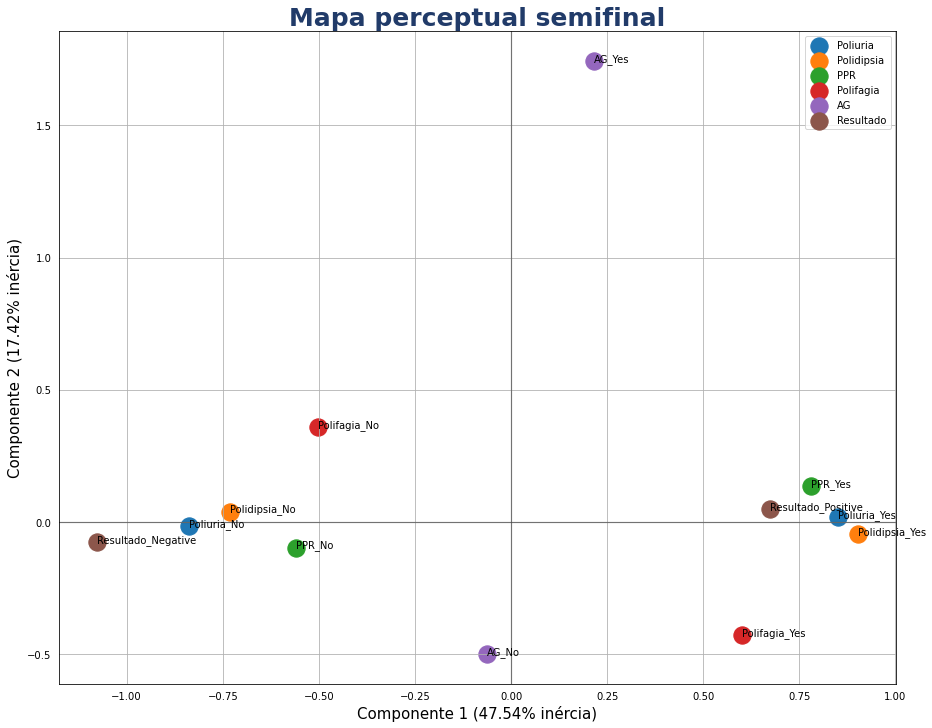

In [17]:
#Novo Mapa perceptual
ax = base_ACM.plot_coordinates(
X = base_diabete,
ax=None,
figsize=(15, 12),
show_row_points=False,
show_row_labels=False,
show_column_points=True,
column_points_size=300,
show_column_labels=True,
legend_n_cols=1)

ei = base_ACM.explained_inertia_

ax.set_title('Mapa perceptual semifinal', fontsize=25, color='#213B69', fontweight=1000, loc='center')
ax.set_xlabel('Componente {} ({:.2f}% inércia)'.format(1, 100 * ei[0]), fontsize=15)
ax.set_ylabel('Componente {} ({:.2f}% inércia)'.format(2, 100 * ei[1]), fontsize=15)

In [18]:
base_ACM.explained_inertia_
it = ((ei[0]) + (ei[1])) * 100

print(f"Inércia explicada:  {it:.2f}%")

Inércia explicada:  64.96%
